In [1]:
%matplotlib notebook

In [2]:
from plotting import *
import numpy as np

Gather data for a typical uniform refinement run

In [3]:
uni_time = 1045.77
uni = {
    'Forward solve': 0.9505,
    'Adjoint solve': 0.0,
    'Error estimation': 0.0,
    'Metric construction': 0.0,
    'Mesh adaptation': 0.0039,
}
uni['Other'] = 1.0 - sum([value for key, value in uni.items()])
assert np.isclose(sum([value for key, value in uni.items()]), 1.0)
for key in uni:
    uni[key] *= uni_time

Gather data for a typical goal-oriented run

In [4]:
go_time = 1103.09
go = {
    'Forward solve': 0.1987,
    'Adjoint solve': 0.0810,
    'Error estimation': 0.6897,
    'Metric construction': 0.005,
    'Mesh adaptation': 0.0047,
}
go['Other'] = 1.0 - sum([value for key, value in go.items()])
assert np.isclose(sum([value for key, value in go.items()]), 1.0)
for key in go:
    go[key] *= go_time

Gather data for a typical data-driven run

In [5]:
ml_time = 373.16
ml = {
    'Forward solve': 0.6341,
    'Adjoint solve': 0.2487,
    'Error estimation': 0.0025 + 0.0204,
    'Metric construction': 0.0038,
    'Mesh adaptation': 0.0155,
}
ml['Other'] = 1.0 - sum([value for key, value in ml.items()])
assert np.isclose(sum([value for key, value in ml.items()]), 1.0)
for key in ml:
    ml[key] *= ml_time

Plot as a stacked bar chart

<IPython.core.display.Javascript object>


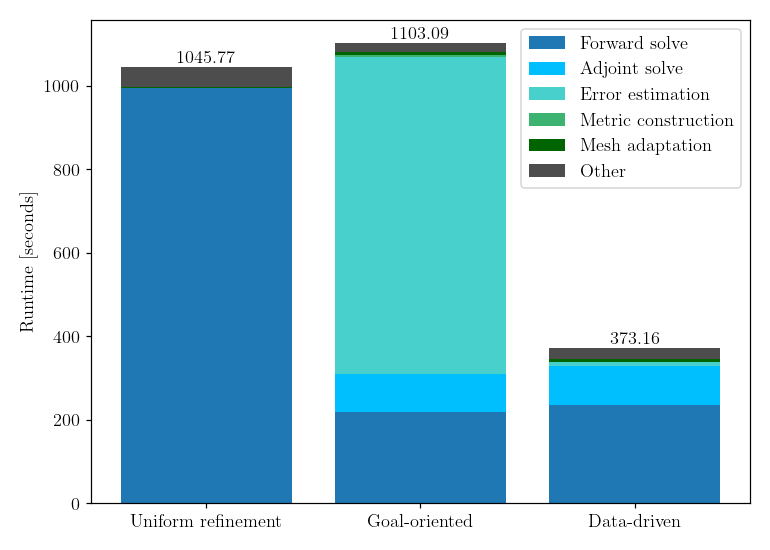

In [6]:
fig, axes = plt.subplots(figsize=(7, 5))
x = ['Uniform refinement', 'Goal-oriented', 'Data-driven']
colours = ['C0', 'deepskyblue', 'mediumturquoise', 'mediumseagreen', 'darkgreen', '0.3']
bottom = np.zeros(len(x))
for i, key in enumerate(go.keys()):
    arr = np.array([d[key] for d in [uni, go, ml]])
    axes.bar(x, arr, bottom=bottom, label=key, color=colours[i])
    bottom += arr
axes.bar_label(axes.containers[-1])
axes.legend(loc='upper right')
axes.set_ylabel('Runtime [seconds]')
plt.tight_layout()
plt.savefig('turbine/plots/timings.pdf')